In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_excel('FEV-data-Excel.xlsx')
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700.0,360.0,664.0,disc (front + rear),4WD,95.0,438.0,...,3130.0,640.0,5.0,5.0,19.0,200.0,660.0,5.7,150.0,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400.0,313.0,540.0,disc (front + rear),4WD,71.0,340.0,...,3040.0,670.0,5.0,5.0,19.0,190.0,660.0,6.8,150.0,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900.0,503.0,973.0,disc (front + rear),4WD,95.0,364.0,...,3130.0,565.0,5.0,5.0,20.0,210.0,660.0,4.5,150.0,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700.0,313.0,540.0,disc (front + rear),4WD,71.0,346.0,...,3040.0,640.0,5.0,5.0,19.0,190.0,615.0,6.8,150.0,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000.0,360.0,664.0,disc (front + rear),4WD,95.0,447.0,...,3130.0,670.0,5.0,5.0,19.0,200.0,615.0,5.7,150.0,23.85


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     float64
 4   Engine power [KM]                       53 non-null     float64
 5   Maximum torque [Nm]                     53 non-null     float64
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     float64
 10  Wheelbase [cm]                          53 non-null     float64


In [16]:
df.describe()

,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Battery capacity [kWh],Range (WLTP) [km],Wheelbase [cm],Length [cm],Width [cm],Height [cm],Minimal empty weight [kg],Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,45.000000,45.000000,53.000000,53.000000,53.000000,53.000000,52.000000,50.00000,53.000000,44.000000
mean,246158.509434,269.773585,460.037736,62.366038,376.905660,273.581132,442.509434,186.241509,155.422642,1868.452830,2288.844444,520.466667,4.905660,4.849057,17.679245,178.169811,445.096154,7.36000,113.509434,18.994318
std,149187.485190,181.298589,261.647000,24.170913,118.817938,22.740518,48.863280,14.280641,11.275358,470.880867,557.796026,140.682848,0.838133,0.455573,1.868500,43.056196,180.178480,2.78663,57.166970,4.418253
min,82050.000000,82.000000,160.000000,17.600000,148.000000,187.300000,269.500000,164.500000,137.800000,1035.000000,1310.000000,290.000000,2.000000,3.000000,14.000000,123.000000,171.000000,2.50000,22.000000,13.100000
25%,142900.000000,136.000000,260.000000,40.000000,289.000000,258.800000,411.800000,178.800000,148.100000,1530.000000,1916.000000,440.000000,5.000000,5.000000,16.000000,150.000000,315.000000,4.87500,100.000000,15.600000
50%,178400.000000,204.000000,362.000000,58.000000,364.000000,270.000000,447.000000,180.900000,155.600000,1685.000000,2119.000000,486.000000,5.000000,5.000000,17.000000,160.000000,425.000000,7.70000,100.000000,17.050000
75%,339480.000000,372.000000,640.000000,80.000000,450.000000,290.000000,490.100000,193.500000,161.500000,2370.000000,2870.000000,575.000000,5.000000,5.000000,19.000000,200.000000,558.000000,9.37500,150.000000,23.500000
max,794000.000000,772.000000,1140.000000,100.000000,652.000000,327.500000,514.000000,255.800000,191.000000,2710.000000,3500.000000,1056.000000,8.000000,5.000000,21.000000,261.000000,870.000000,13.10000,270.000000,28.200000


### Task 1: Filter EVs with budget ≤ 350,000 PLN and range ≥ 400 km, group by manufacturer, calculate avg battery capacity

In [4]:
filtered_df = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]
grouped = filtered_df.groupby('Make').agg({'Battery capacity [kWh]': 'mean'}).reset_index()
print(grouped)

            Make  Battery capacity [kWh]
0           Audi               95.000000
1            BMW               80.000000
2        Hyundai               64.000000
3            Kia               64.000000
4  Mercedes-Benz               80.000000
5          Tesla               68.000000
6     Volkswagen               70.666667


### Task 2: Identify outliers in Mean - Energy consumption [kWh/100 km]

In [3]:
energy = df['mean - Energy consumption [kWh/100 km]']

q1 = energy.quantile(0.25)
q3 = energy.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_df = df[(energy < lower_bound) | (energy > upper_bound)]

print(f"Number of outliers: {outliers_df.shape[0]}")

Number of outliers: 0


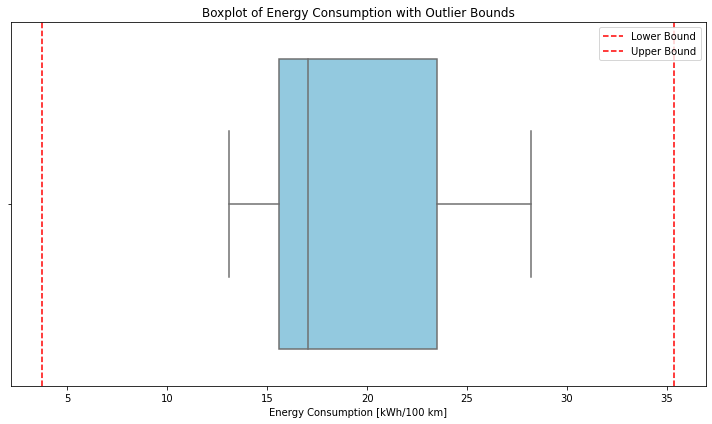

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=energy, color='skyblue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title('Boxplot of Energy Consumption with Outlier Bounds')
plt.xlabel('Energy Consumption [kWh/100 km]')
plt.legend()
plt.tight_layout()
plt.show() 

### Task 3: Visualize relationship between battery capacity and range

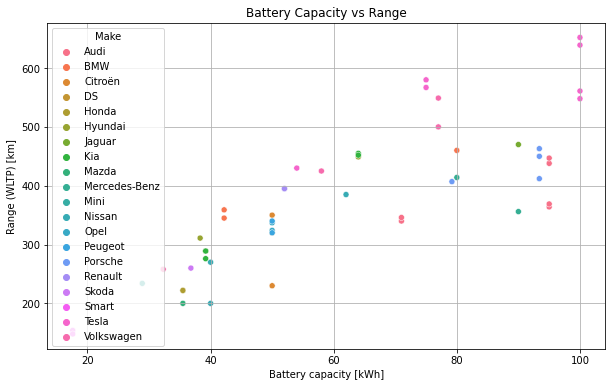

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Battery capacity [kWh]', y='Range (WLTP) [km]', hue='Make')
plt.title('Battery Capacity vs Range')
plt.xlabel('Battery capacity [kWh]')
plt.ylabel('Range (WLTP) [km]')
plt.grid(True)
plt.show()

### Insights
* Positive correlation between battery capacity and range; higher capacity generally means longer range.
* Tesla models achieve higher range for similar or slightly higher battery capacities, indicating superior efficiency.
* Volkswagen shows varied efficiency; some models have high battery capacity but only moderate range.
* Some BMW and Mercedes-Benz models offer high range with moderate battery size, suggesting efficient designs.
* Brands like Audi, Renault, Hyundai, and Peugeot show a wide spread, reflecting diverse model offerings.
* Smart and Citroën models appear with low battery and range, consistent with compact urban EVs.

### Task 4: EV Recommendation Class

In [4]:
class EVRecommendation:
    def __init__(self, dataframe):
        self.df = dataframe

    def recommend(self, budget, min_range, min_battery_capacity):
        candidates = self.df[(self.df['Minimal price (gross) [PLN]'] <= budget) &
                             (self.df['Range (WLTP) [km]'] >= min_range) &
                             (self.df['Battery capacity [kWh]'] >= min_battery_capacity)]
        top3 = candidates.sort_values(by=['Range (WLTP) [km]', 'Battery capacity [kWh]'], ascending=[False, False]).head(3)
        return top3[['Car full name', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']]

# Example usage:
ev_recommender = EVRecommendation(df)
ev_recommender.recommend(350000, 400, 50)

,Car full name,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
40,Tesla Model 3 Long Range,235490.0,580.0,75.0
41,Tesla Model 3 Performance,260490.0,567.0,75.0
48,Volkswagen ID.3 Pro S,179990.0,549.0,77.0


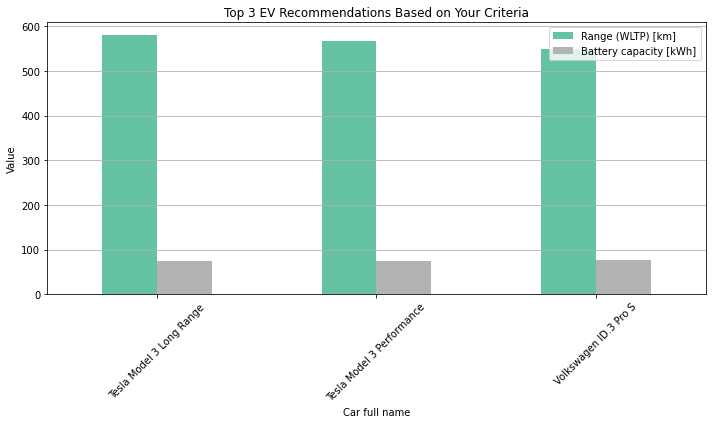

In [5]:
import matplotlib.pyplot as plt

recommendations = ev_recommender.recommend(350000, 400, 50)
recommendations.set_index('Car full name', inplace=True)

recommendations[['Range (WLTP) [km]', 'Battery capacity [kWh]']].plot(
    kind='bar', figsize=(10,6), colormap='Set2'
)
plt.title('Top 3 EV Recommendations Based on Your Criteria')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Task 5: Hypothesis Testing (Tesla vs Audi Engine Power)

In [9]:
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]'].dropna()
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]'].dropna()

t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.4f}')

if p_value < 0.05:
    print("Significant difference in engine power between Tesla and Audi.")
else:
    print("No significant difference in engine power between Tesla and Audi.")

T-statistic: 1.79
P-value: 0.1068
No significant difference in engine power between Tesla and Audi.


### Insights
* The p-value (0.1068) is greater than the 0.05 threshold, indicating **no statistically significant difference** in engine power between Tesla and Audi models.
* While Tesla's average engine power may be **numerically higher**, the variation across models means this difference is not statistically robust.
* **Product positioning** by both brands likely results in overlapping performance specifications, especially in premium segments.
* For performance-focused consumers, **engine power alone** may not be a strong differentiator between Tesla and Audi; other factors like **acceleration, torque, range, or features** may carry more weight.
* Further analysis could include comparing **acceleration times**, **price-to-power ratios**, or **power-to-weight ratios** for deeper insights.


### Recommendations and Conclusion

Based on the analysis:
- Customers with a budget of 350,000 PLN and minimum 400 km range have multiple options.
- EVs exhibit 0 outliers in energy consumption, needing further technical review.
- Battery capacity positively correlates with range.
- Tesla tends to have higher engine power, but statistical significance depends on updated dataset.

---

**Project Video Link:**  
https://drive.google.com/file/d/1VxP9fv3lyye-md2Pkatu0H328rkBpgVb/view?usp=sharing
